# **<h1 align="center"><font color=blue> Linear Algebra</font></h1>**

# Lecture 19
- Introduction to Vectors & Vector Operations

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Working with Multidimensional Data

All of the tests we have done so far have worked on one-dimensional data. I.e., we look at some statistics from samples of a single feature, but we tried to determine whether that feature was influenced by some other binary event.

For example, we looked at firearms mortality rates before and after the federal assault weapons ban.

However, many times we want to investigate the relation between multiple features. We saw an example of this with the firearms mortality rate data: what if we look at the relation between the number of laws regulating guns and the firearms mortality in each state:

In [2]:
df=pd.read_csv('firearms-combined.csv')

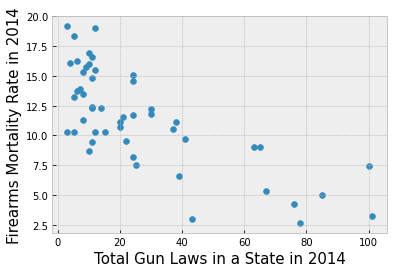

In [3]:
plt.scatter(df['Total Laws 2014'],df['RATE-2014'])
plt.xlabel('Total Gun Laws in a State in 2014',size=15)
plt.ylabel('Firearms Mortality Rate in 2014',size=15);

There seems to be a relation between these two features: as the number of total gun laws in a state in 2014 increases, the firearms mortality rate decreases. 

But until now, we only knew how to evaluate this relation by looking at a single feature (firearms mortality rate) and clustering that data into two groups based on the number of total gun laws.

We are ready to apply more sophisticated approaches to study how multiple features are related, but we need some new tools:

## Vectors


<div class="alert alert-info">
  <strong>Vectors</strong>

*Vectors* are ordered lists of numbers. 

</div>

Vectors are very similar to lists or tuples in Python.

Usually, the numbers come from the set of real numbers, which we denote by $\mathbb{R}$.

<div class="alert alert-info">
      <strong>Scalars</strong>

Single numerical values are called *scalars*.
</div>

<div class="alert alert-warning">

We use various conventions in writing vectors. To distinguish a vector variable from a scalar, we will write it in **bold** when typed:

$~~~~~$A vector $\mathbf{x}$ and a scalar $\alpha$.

For convenience, we will often write them in the same way as Python tuples: $~~~~~\mathbf{x} = (0.5,3,0.7, -1.0)$

Vectors are often written as a special type of array or numerical table that is only 1 number wide. In this case, we usually use square brackets to deliminate the vector:
\begin{align}
\mathbf{x} = \begin{bmatrix}
           0.5 \\
           3 \\
           0.7 \\
           -1.0
         \end{bmatrix}
\end{align}
Sometimes, such a vector is called a *column vector*.

To save space, we can also write a column vector like
$~~~~~\mathbf{x} = \left[0.5,3,0.7, -1.0\right]^T$,

where the superscript $~^T$ denotes that the vector is turned $90^\circ$
    
</div>

<div class="alert alert-info">
      <strong>Vector Elements</strong>

The *elements* (or *entries*, *coefficients*, *components*) of a vector are the values within that vector.
</div>

<div class="alert alert-warning">

If $\mathbf{a}$ is a vector, then $a_i$ denotes the $i$th element of the vector. 

<font color='red'>Unlike Python, the convention in mathematics is to index from 1.</font>
</div>


$~~~~~$For the example $\mathbf{x}= \left[0.5,3,0.7, -1.0\right]^T$, $x_3=0.7$

<div class="alert alert-info">
  <strong>Dimension</strong>
    
The **dimension** (or **size**) of a vector is the number of elements it contains.
</div>

$~~~~~$ For the example $x$ above, the dimension is $4$.

A vector of size $n$ is called an $n$-dimensional vector, or simply a $n$-vector.

The set of all $n$-vectors over the real line is denoted by $\mathbb{R}^n$. 

<font color="red"> Although Boyd and Vandenberghe say that another name for dimension is *length*, we will reserve that term for a different property of vectors.</font>

## Special vectors

**<font color="blue">Zero Vectors</font>** A *zero vector* is a vector with all elements equal to zero. We will denote the $n$-dimensional zero vector by $\mathbf{0}_n$.

$~~~~~$ For example, 
\begin{align}
\mathbf{0}_5 = 
\begin{bmatrix}
0\\0\\0\\0\\ 0
\end{bmatrix}
\end{align}

In [4]:
np.zeros((10,1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [5]:
np.zeros((10,1)).shape

(10, 1)

**<font color="blue">Ones vectors</font>** A *ones vector* is a vector with all elements equal to one. We will denote the $n$-dimensional ones vector by $\mathbf{1}_n$.

In [6]:
np.ones((5,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [7]:
np.ones((5,1)).shape

(5, 1)

**<font color="blue">Standard Unit Vectors</font>** A *standard unit vector* is a vector with all elements equal to zero, except one element which is equal to one. 

For a given dimension $n$, we denote the stanard unit vector with element $i$ equal to 1 by $e_i$. 

For example, the three standard unit vectors of dimension 3 are:

\begin{align}
e_1=
\begin{bmatrix}
1\\ 0\\ 0
\end{bmatrix}, ~~~~~
e_2=
\begin{bmatrix}
0\\ 1\\ 0
\end{bmatrix}, ~~~~~
e_3=
\begin{bmatrix}
0\\ 0\\ 1
\end{bmatrix}
\end{align}

### Uses

Vectors are typically used to represent:
* Any $n$-dimensional data
* Points in a plane
* Displacements between data values or points in a plane

Some examples (from Section 1.1 in the Boyd book) include:
* **Colors**: represented as intensities of Red, Green, and Blue (RGB) or Chrome, Magenta, Yellow, and Black (CMYK), etc.
* **Portfolio allocations**: $(10,25,75)$ may denote 10 shares of stock $A$, 25 shares of stock $B$, and 75 shares of stock $C$
* **Proportions**: A vector with values adding to 1 indicating whta proportion is associated with various choices, outcomes, or options. For example, $(0.25, 0.3, 0.45)$ may denote 25% associated with one source, 30% associated with a second source, and 45% associated with a third source
* **Time series**: the value of some quantity at different times

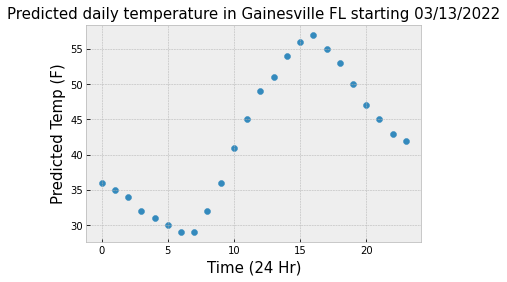

In [8]:
predicted_temps=[36, 35, 34, 32, 31, 30, 29, 29, 32, 36, 41, 45, 
                 49, 51, 54, 56, 57, 55, 53, 50, 47, 45, 43, 42]
time=list(range(0,24))

plt.scatter(time, predicted_temps)
plt.ylabel('Predicted Temp (F)',size=15)
plt.xlabel('Time (24 Hr)',size=15)
plt.title('Predicted daily temperature in Gainesville FL starting 03/13/2022',size=15);

## Visualizing Vectors

Vectors are most often visualized as displacements from a point. If no starting point is given, then the vector is the displacement from the origin.

We are only going to plot $2$-vectors here. For 2-vectors, the components the vectors are taken to represent $x$ and $y$ displacement:
$$
\mathbf{a} = 
\begin{bmatrix}
a_x\\ a_y
\end{bmatrix}
$$

To make life easier, here is a simple function to plot multiple vectors on the same axes and automatically choose the $x$- and $y$-limits for plotting:

In [9]:
def plotvec(*argv):
    colors=['b','k','r','g','c','m']
    xmin=0
    xmax=-1000000
    ymin=0
    ymax=-1000000
    origin=[0,0]
    plt.figure()
    for e in enumerate(argv):
        i=e[0]
        arg=e[1]
        plt.quiver(*origin,*arg,angles='xy',scale_units='xy',scale=1,
                   color=colors[i%len(colors)])
        xmin=min(xmin,arg[0])
        xmax=max(xmax,arg[0])
        ymin=min(ymin,arg[1])
        ymax=max(ymax,arg[1])
    plt.xlim(min(-1, xmin-1), max(1,xmax+1))
    plt.ylim(min(-1,ymin-1),max(1,ymax+1))

Consider the vector $\mathbf{a}=[2,3]^T$. In two-dimensional space, this means start at the origin and move 2 in the $x$ direction (to the right) and 3 in the $y$ direction (up). 

We draw an arrow from (0,0) to (2,3) to represent this vector.

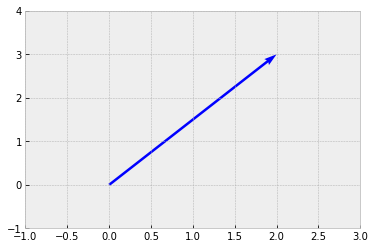

In [10]:
a = [2,3]

plotvec(a)

Let's create a second vector. We can plot both:

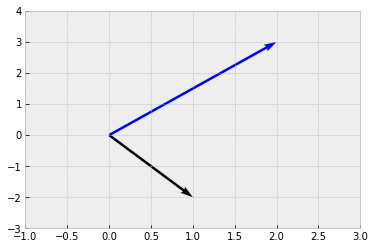

In [11]:
b = [1,-2]

plotvec(a,b)

Create another vector and plot it with $a$ and $b$:

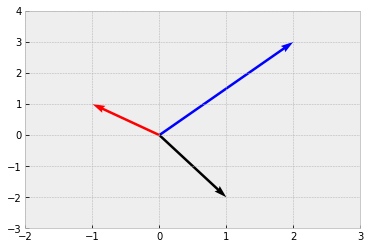

In [12]:
c = [-1, 1]

plotvec(a,b,c)

If vectors represent displacements, then we can consider a sequence of vectors as a set of instructions for how to move, starting at the origin. In this case, the starting point for $b$ should be $a$.

In [13]:
def plotvec2(*argv):
    colors=['b','k','r','g','c','m']
    xmin=0
    xmax=-1000000
    ymin=0
    ymax=-1000000
    origin=[0,0]
    plt.figure()
    for e in enumerate(argv):
        i=e[0]
        arg=e[1]
        plt.quiver(*origin,*arg,angles='xy',scale_units='xy',scale=1,color=colors[i%len(colors)])
        xmin=min(xmin,origin[0]+arg[0])
        xmax=max(xmax,origin[0]+arg[0])
        ymin=min(ymin,origin[1]+arg[1])
        ymax=max(ymax,origin[1]+arg[1])
        origin=arg
    plt.xlim(min(-1, xmin-1), max(1,xmax+1))
    plt.ylim(min(-1,ymin-1),max(1,ymax+1))

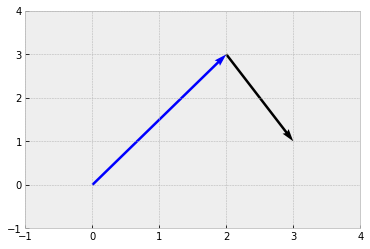

In [14]:
plotvec2(a,b)

### Vector Addition

The sum of two displacements results in a single overall displacement:


In [16]:
def plotvecsum(*argv):
    colors=['k','b','r','g','c','m']
    xmin=0
    xmax=-1000000
    ymin=0
    ymax=-1000000
    origin=[0,0]
    plt.figure()
    for e in enumerate(argv):
        i=e[0]
        arg=e[1]
        plt.quiver(*origin,*arg,angles='xy',scale_units='xy',
                   scale=1,color=colors[i%len(colors)])
        xmin=min(xmin,origin[0]+arg[0])
        xmax=max(xmax,origin[0]+arg[0])
        ymin=min(ymin,origin[1]+arg[1])
        ymax=max(ymax,origin[1]+arg[1])
        result=[origin[0]+arg[0],origin[1]+arg[1]]
        origin=arg
    plt.xlim(xmin-1,xmax+1)
    plt.ylim(ymin-1,ymax+1)
    plt.quiver(*[0,0],*result,angles='xy',scale_units='xy',
               scale=1,color='r')

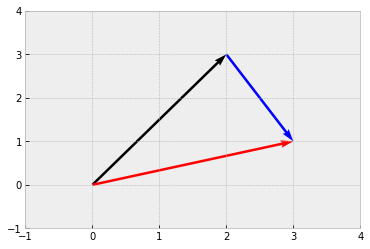

In [17]:
plotvecsum(a,b)

**What is the rule to calculate the overall displacement?**

If $\mathbf{c}= \mathbf{a} + \mathbf{b}$, then $c_i = a_i+b_i$ for all $i=1,2,\ldots,n$

Implement a function to perform vector addition on any two lists:

In [28]:
def add(a,b):
    if len(a) != len(b):
        raise ValueError('The dimensions must be the same!')
        
    c=[]
    for i in range(len(a)):
        c += [a[i] + b[i]]
    return c

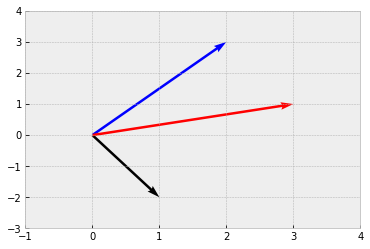

In [29]:
c = add(a,b)

plotvec(a,b,c)

In [30]:
add([1,2],[1,2,2])

ValueError: The dimensions must be the same!

### Properties of Vector Addition

Because vector addition is component-wise scalar addition, it inherits many of its properties from scalar addition.
<div class="alert alert-info">
    
* *Commutative*: $\mathbf{a}+\mathbf{b} = \mathbf{b} + \mathbf{a}$
* *Associative*: $(\mathbf{a}+\mathbf{b}) +\mathbf{c} = \mathbf{a}+(\mathbf{b} +\mathbf{c})$
* *Identity*: The zero-vector is the identity for vector addition: $\mathbf{a} + \mathbf{0}  = \mathbf{a}$
    
</div>

## Scalar-Vector Multiplication (Scaling)

In scalar-vector multiplcation, a vector is  multiplied by a scalar (a number). This is achieved by multiplying every element of the vector by the scalar:

$$ \alpha \begin{bmatrix} x_1 \\ x_2\\ \vdots \\ x_n \end{bmatrix} = \begin{bmatrix} \alpha x_1 \\ \alpha x_2\\ \vdots \\ \alpha x_n \end{bmatrix}$$

Implement a function to perform scalar-vector multiplication. 

1. Plot $\mathbf{a}$ and $0.5\mathbf{a}$. 
2. Plot $\mathbf{b}$ and $2.5\mathbf{b}$.

In [31]:
def multiply(alpha,x):
    # multiply alpha and x: c = alpha*x
    c = []
    for i in range(len(x)):
        c += [alpha*x[i]]
    return c    

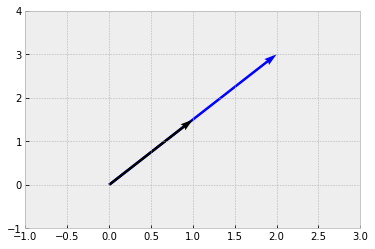

In [32]:
plotvec(a, multiply(0.5,a))

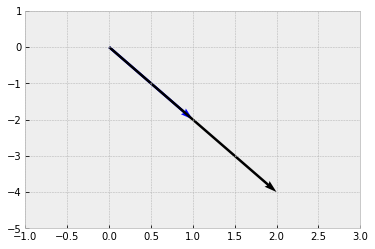

In [33]:
plotvec(b, multiply(2,b))

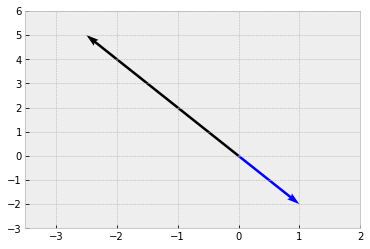

In [34]:
plotvec(b, multiply(-2.5,b))

**What do you observe?**

Resulting vector is in same direction as original vector, but it's length has been scaled.

### Properties of Scaling

<div class="alert alert-info">


* *Commutative*: $\alpha \mathbf{x} = \mathbf{x} \alpha$
* *Associative*: If $\alpha$ and $\beta$ are scalars, then $(\alpha  \beta) \mathbf{x} = \alpha (\beta \mathbf{x})$
* *Distributive over scalar addition*: $(\alpha+\beta) \mathbf{x} = \alpha \mathbf{x} + \beta \mathbf{x}$ and $\mathbf{x} (\alpha+\beta)  = \mathbf{x}\alpha  + \mathbf{x} \beta $ 
* *Distributive over vector addition*: $\alpha ( \mathbf{x} +\mathbf{y}) = \alpha \mathbf{x} + \alpha \mathbf{y}$

</div>